In [5]:
#imporing the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
import pandasql as psql



In [6]:
# load the Loan data
Loandata = pd.read_csv(r"C:\Users\gowth\Downloads\archive\Loan_Default.csv",header=0)
Loandata_bk = Loandata.copy()
Loandata.head(30)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,706500,3.990,0.1523,370.00,360.0,not_neg,not_int,not_lpsm,1008000.0,sb,pr,home,1U,10080.0,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,346500,4.500,0.9998,5120.00,360.0,not_neg,not_int,not_lpsm,438000.0,sb,pr,home,1U,5040.0,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,266500,4.125,0.2975,5609.88,360.0,not_neg,not_int,not_lpsm,308000.0,sb,pr,home,1U,3780.0,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,376500,4.875,0.7395,1150.00,360.0,not_neg,not_int,not_lpsm,478000.0,sb,pr,home,1U,5580.0,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0
9,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,436500,3.490,-0.2776,2316.50,360.0,not_neg,not_int,not_lpsm,688000.0,sb,pr,home,1U,6720.0,CIB,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0


In [3]:
#checking the null values
Loandata.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [4]:
#geting info of the dataset
Loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
#display the unique values of all the variables

Loandata.nunique()

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [6]:
# use lableencoder for target variables
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

Loandata['Gender']=LE.fit_transform(Loandata['Gender'])
Loandata['approv_in_adv']=LE.fit_transform(Loandata['approv_in_adv'])
Loandata['loan_type']=LE.fit_transform(Loandata['loan_type'])
Loandata['loan_purpose']=LE.fit_transform(Loandata['loan_purpose'])
Loandata['business_or_commercial']=LE.fit_transform(Loandata['business_or_commercial'])
Loandata['loan_purpose']=LE.fit_transform(Loandata['loan_purpose'])
Loandata['credit_type']=LE.fit_transform(Loandata['credit_type'])
Loandata['co-applicant_credit_type']=LE.fit_transform(Loandata['co-applicant_credit_type'])
Loandata['submission_of_application']=LE.fit_transform(Loandata['submission_of_application'])
Loandata['Region']=LE.fit_transform(Loandata['Region'])
Loandata['Neg_ammortization']=LE.fit_transform(Loandata['Neg_ammortization'])
Loandata['lump_sum_payment']=LE.fit_transform(Loandata['lump_sum_payment'])
Loandata['Credit_Worthiness']=LE.fit_transform(Loandata['Credit_Worthiness'])
Loandata['interest_only']=LE.fit_transform(Loandata['interest_only'])


In [7]:
Loandata.head(30)
Loandata['open_credit'].value_counts()

nopc    148114
opc        556
Name: open_credit, dtype: int64

In [8]:
#count the target or dependent variable by 0 or 1 and their propotion
# (>10 : 1,then the dataset is inbalance data)

status_count = Loandata.Status.value_counts()
print('Class 0:',status_count[0])
print('Class 1:', status_count[1])
print('Proportion:', round(status_count[0] / status_count[1], 2), ': 1')
print('Total Bank records:', len(Loandata))

Class 0: 112031
Class 1: 36639
Proportion: 3.06 : 1
Total Bank records: 148670


In [9]:
#display duplicate values  with in dataset

Loandata_dup=Loandata[Loandata.duplicated(keep='last')]

#display the duplicate records

Loandata_dup

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1


In [10]:

Loandata.head(40)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,3,0,0,0,0,nopc,1,116500,NaN,NaN,NaN,360.0,1,1,1,118000.0,sb,pr,home,1U,1740.0,3,758,0,25-34,1,98.728814,3,direct,1,45.0
1,24891,2019,cf,2,0,1,0,0,nopc,0,206500,NaN,NaN,NaN,360.0,1,1,0,NaN,sb,pr,home,1U,4980.0,2,552,1,55-64,1,NaN,0,direct,1,NaN
2,24892,2019,cf,2,1,0,0,0,nopc,1,406500,4.560,0.2000,595.00,360.0,0,1,1,508000.0,sb,pr,home,1U,9480.0,3,834,0,35-44,1,80.019685,3,direct,0,46.0
3,24893,2019,cf,2,0,0,3,0,nopc,1,456500,4.250,0.6810,NaN,360.0,1,1,1,658000.0,sb,pr,home,1U,11880.0,3,587,0,45-54,0,69.376900,0,direct,0,42.0
4,24894,2019,cf,1,1,0,0,0,nopc,1,696500,4.000,0.3042,0.00,360.0,1,1,1,758000.0,sb,pr,home,1U,10440.0,1,602,1,25-34,0,91.886544,0,direct,0,39.0
5,24895,2019,cf,1,1,0,0,0,nopc,1,706500,3.990,0.1523,370.00,360.0,1,1,1,1008000.0,sb,pr,home,1U,10080.0,3,864,1,35-44,0,70.089286,0,direct,0,40.0
6,24896,2019,cf,1,1,0,2,0,nopc,1,346500,4.500,0.9998,5120.00,360.0,1,1,1,438000.0,sb,pr,home,1U,5040.0,3,860,1,55-64,1,79.109589,0,direct,0,44.0
7,24897,2019,NaN,0,0,0,3,0,nopc,1,266500,4.125,0.2975,5609.88,360.0,1,1,1,308000.0,sb,pr,home,1U,3780.0,0,863,0,55-64,1,86.525974,0,direct,0,42.0
8,24898,2019,cf,1,0,0,2,0,nopc,1,376500,4.875,0.7395,1150.00,360.0,1,1,1,478000.0,sb,pr,home,1U,5580.0,0,580,1,55-64,1,78.765690,2,direct,0,44.0
9,24899,2019,cf,3,0,2,2,0,nopc,1,436500,3.490,-0.2776,2316.50,360.0,1,1,1,688000.0,sb,pr,home,1U,6720.0,0,788,1,55-64,1,63.444767,3,direct,0,30.0


In [11]:
Loandata.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [12]:
#filling the null values by imputers
from sklearn.impute import KNNImputer


  


#Create an object
imputer_knn=KNNImputer(missing_values=np.nan)



Loandata['rate_of_interest']=imputer_knn.fit_transform(Loandata[['rate_of_interest']])
Loandata['Interest_rate_spread']=imputer_knn.fit_transform(Loandata[['Interest_rate_spread']])
Loandata['Upfront_charges']=imputer_knn.fit_transform(Loandata[['Upfront_charges']])
Loandata['property_value']=imputer_knn.fit_transform(Loandata[['property_value']])
Loandata['LTV']=imputer_knn.fit_transform(Loandata[['LTV']])
Loandata['dtir1']=imputer_knn.fit_transform(Loandata[['dtir1']])
Loandata['income']=imputer_knn.fit_transform(Loandata[['income']])
Loandata['term']=imputer_knn.fit_transform(Loandata[['term']])









#Convert the float value to integer value

Loandata['rate_of_interest']=Loandata['rate_of_interest'].astype(int)
Loandata['Interest_rate_spread']=Loandata['Interest_rate_spread'].astype(int)
Loandata['Upfront_charges']=Loandata['Upfront_charges'].astype(int)
Loandata['property_value']=Loandata['property_value'].astype(int)
Loandata['LTV']=Loandata['LTV'].astype(int)
Loandata['dtir1']=Loandata['dtir1'].astype(int)








#Display the Claims Data
Loandata.head(30)


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,3,0,0,0,0,nopc,1,116500,4,0,3224,360.0,1,1,1,118000,sb,pr,home,1U,1740.000000,3,758,0,25-34,1,98,3,direct,1,45
1,24891,2019,cf,2,0,1,0,0,nopc,0,206500,4,0,3224,360.0,1,1,0,497893,sb,pr,home,1U,4980.000000,2,552,1,55-64,1,72,0,direct,1,37
2,24892,2019,cf,2,1,0,0,0,nopc,1,406500,4,0,595,360.0,0,1,1,508000,sb,pr,home,1U,9480.000000,3,834,0,35-44,1,80,3,direct,0,46
3,24893,2019,cf,2,0,0,3,0,nopc,1,456500,4,0,3224,360.0,1,1,1,658000,sb,pr,home,1U,11880.000000,3,587,0,45-54,0,69,0,direct,0,42
4,24894,2019,cf,1,1,0,0,0,nopc,1,696500,4,0,0,360.0,1,1,1,758000,sb,pr,home,1U,10440.000000,1,602,1,25-34,0,91,0,direct,0,39
5,24895,2019,cf,1,1,0,0,0,nopc,1,706500,3,0,370,360.0,1,1,1,1008000,sb,pr,home,1U,10080.000000,3,864,1,35-44,0,70,0,direct,0,40
6,24896,2019,cf,1,1,0,2,0,nopc,1,346500,4,0,5120,360.0,1,1,1,438000,sb,pr,home,1U,5040.000000,3,860,1,55-64,1,79,0,direct,0,44
7,24897,2019,NaN,0,0,0,3,0,nopc,1,266500,4,0,5609,360.0,1,1,1,308000,sb,pr,home,1U,3780.000000,0,863,0,55-64,1,86,0,direct,0,42
8,24898,2019,cf,1,0,0,2,0,nopc,1,376500,4,0,1150,360.0,1,1,1,478000,sb,pr,home,1U,5580.000000,0,580,1,55-64,1,78,2,direct,0,44
9,24899,2019,cf,3,0,2,2,0,nopc,1,436500,3,0,2316,360.0,1,1,1,688000,sb,pr,home,1U,6720.000000,0,788,1,55-64,1,63,3,direct,0,30


In [13]:
#SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None,verbose=0,copy=True,add_indicator=False)

from sklearn.impute import SimpleImputer

#SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None,verbose='deprecated',copy=True,add_indicator=False,keep_empty_features=False)


#Create an object
imputer_si=SimpleImputer(missing_values=np.nan,strategy='most_frequent')


Loandata['loan_limit']=imputer_si.fit_transform(Loandata[['loan_limit']])
Loandata['age']=imputer_si.fit_transform(Loandata[['age']])





In [14]:
Loandata['Secured_by'].value_counts()

home    148637
land        33
Name: Secured_by, dtype: int64

In [15]:
#using the map function to convert into labels
Loandata['loan_limit']= Loandata['loan_limit'].map({'cf':0,'ncf':1})
Loandata['open_credit']= Loandata['open_credit'].map({'nopc':0,'opc':1})
Loandata['construction_type']= Loandata['construction_type'].map({'sb':0,'mh':1})
Loandata['occupancy_type']= Loandata['occupancy_type'].map({'pr':0,'ir':1,'sr':2})
Loandata['Security_Type']= Loandata['Security_Type'].map({'direct':0,'Indriect':1})
Loandata['age']= Loandata['age'].map({'<25':0,'25-34':1,'35-44':2,'45-54':3,'55-64':4,'65-74':5,'>74':6})


In [16]:
#using the map function to convert into labels

Loandata['Secured_by']= Loandata['Secured_by'].map({'home':0,'land':1})
Loandata['total_units']= Loandata['total_units'].map({'1U':0,'2U':1,'3U':2,'4U':3})



In [17]:
#getting the result dataset
Loandata.head(60)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,0,3,0,0,0,0,0,1,116500,4,0,3224,360.0,1,1,1,118000,0,0,0,0,1740.000000,3,758,0,1,1,98,3,0,1,45
1,24891,2019,0,2,0,1,0,0,0,0,206500,4,0,3224,360.0,1,1,0,497893,0,0,0,0,4980.000000,2,552,1,4,1,72,0,0,1,37
2,24892,2019,0,2,1,0,0,0,0,1,406500,4,0,595,360.0,0,1,1,508000,0,0,0,0,9480.000000,3,834,0,2,1,80,3,0,0,46
3,24893,2019,0,2,0,0,3,0,0,1,456500,4,0,3224,360.0,1,1,1,658000,0,0,0,0,11880.000000,3,587,0,3,0,69,0,0,0,42
4,24894,2019,0,1,1,0,0,0,0,1,696500,4,0,0,360.0,1,1,1,758000,0,0,0,0,10440.000000,1,602,1,1,0,91,0,0,0,39
5,24895,2019,0,1,1,0,0,0,0,1,706500,3,0,370,360.0,1,1,1,1008000,0,0,0,0,10080.000000,3,864,1,2,0,70,0,0,0,40
6,24896,2019,0,1,1,0,2,0,0,1,346500,4,0,5120,360.0,1,1,1,438000,0,0,0,0,5040.000000,3,860,1,4,1,79,0,0,0,44
7,24897,2019,0,0,0,0,3,0,0,1,266500,4,0,5609,360.0,1,1,1,308000,0,0,0,0,3780.000000,0,863,0,4,1,86,0,0,0,42
8,24898,2019,0,1,0,0,2,0,0,1,376500,4,0,1150,360.0,1,1,1,478000,0,0,0,0,5580.000000,0,580,1,4,1,78,2,0,0,44
9,24899,2019,0,3,0,2,2,0,0,1,436500,3,0,2316,360.0,1,1,1,688000,0,0,0,0,6720.000000,0,788,1,4,1,63,3,0,0,30


In [18]:
#checking the null values
Loandata.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [19]:
#deleting the independent columns
del Loandata['ID']
del Loandata['year']

In [20]:
#getting the result dataset
Loandata.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0,3,0,0,0,0,0,1,116500,4,0,3224,360.0,1,1,1,118000,0,0,0,0,1740.0,3,758,0,1,1,98,3,0,1,45
1,0,2,0,1,0,0,0,0,206500,4,0,3224,360.0,1,1,0,497893,0,0,0,0,4980.0,2,552,1,4,1,72,0,0,1,37
2,0,2,1,0,0,0,0,1,406500,4,0,595,360.0,0,1,1,508000,0,0,0,0,9480.0,3,834,0,2,1,80,3,0,0,46
3,0,2,0,0,3,0,0,1,456500,4,0,3224,360.0,1,1,1,658000,0,0,0,0,11880.0,3,587,0,3,0,69,0,0,0,42
4,0,1,1,0,0,0,0,1,696500,4,0,0,360.0,1,1,1,758000,0,0,0,0,10440.0,1,602,1,1,0,91,0,0,0,39


In [21]:
#deleting the independent columns

Loandata.drop(['submission_of_application','co-applicant_credit_type','total_units','Gender'],axis=1,inplace=True)


In [22]:
#count the target or dependent variable by 0 or 1 and their propotion
# (>10 : 1,then the dataset is inbalance data)

Status_count = Loandata.Status.value_counts()
print('Class 0:',Status_count[0])
print('Class 1:', Status_count[1])
print('Proportion:', round(Status_count[0] / Status_count[1], 2), ': 1')
print('Total Bank records:', len(Loandata))

Class 0: 112031
Class 1: 36639
Proportion: 3.06 : 1
Total Bank records: 148670


In [23]:
Loandata.head()

,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,income,credit_type,Credit_Score,age,LTV,Region,Security_Type,Status,dtir1
0,0,0,0,0,0,0,1,116500,4,0,3224,360.0,1,1,1,118000,0,0,0,1740.0,3,758,1,98,3,0,1,45
1,0,0,1,0,0,0,0,206500,4,0,3224,360.0,1,1,0,497893,0,0,0,4980.0,2,552,4,72,0,0,1,37
2,0,1,0,0,0,0,1,406500,4,0,595,360.0,0,1,1,508000,0,0,0,9480.0,3,834,2,80,3,0,0,46
3,0,0,0,3,0,0,1,456500,4,0,3224,360.0,1,1,1,658000,0,0,0,11880.0,3,587,3,69,0,0,0,42
4,0,1,0,0,0,0,1,696500,4,0,0,360.0,1,1,1,758000,0,0,0,10440.0,1,602,1,91,0,0,0,39


In [24]:
#identify the independent and target (dependent) variables

IndepVar=[]
for col in Loandata.columns:
    if col!='Status':
        IndepVar.append(col)
        
TargetVar='Status'
x=Loandata[IndepVar]
y=Loandata[TargetVar]

In [25]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=143)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((104069, 27), (44601, 27), (104069,), (44601,))

In [26]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [27]:
#loading the result model file
KNN_Results=pd.read_csv(r"C:\Users\gowth\Downloads\KNN_Results.csv",header=0)

KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 6223  4599]
 [ 1792 31987]]
Outcome values : 
 6223 4599 1792 31987
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.58      0.66     10822
           0       0.87      0.95      0.91     33779

    accuracy                           0.86     44601
   macro avg       0.83      0.76      0.78     44601
weighted avg       0.85      0.86      0.85     44601

Accuracy : 85.7 %
Precision : 77.6 %
Recall : 57.5 %
F1 Score : 0.661
Specificity or True Negative Rate : 94.7 %
Balanced Accuracy : 76.1 %
MCC : 0.583
roc_auc_score: 0.761


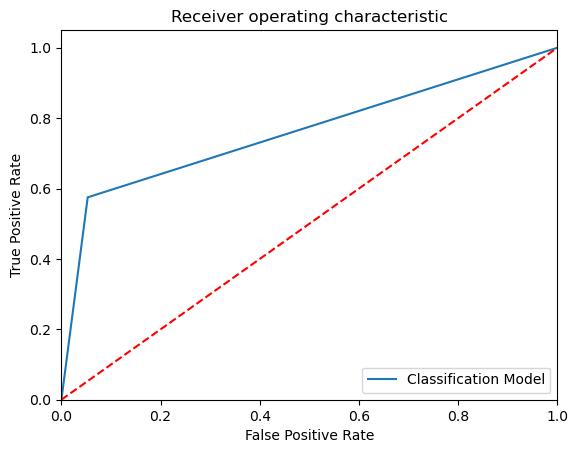

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 5262  5560]
 [  509 33270]]
Outcome values : 
 5262 5560 509 33270
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.49      0.63     10822
           0       0.86      0.98      0.92     33779

    accuracy                           0.86     44601
   macro avg       0.88      0.74      0.78     44601
weighted avg       0.87      0.86      0.85     44601

Accuracy : 86.4 %
Precision : 91.2 %
Recall : 48.6 %
F1 Score : 0.634
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 73.6 %
MCC : 0.602
roc_auc_score: 0.736


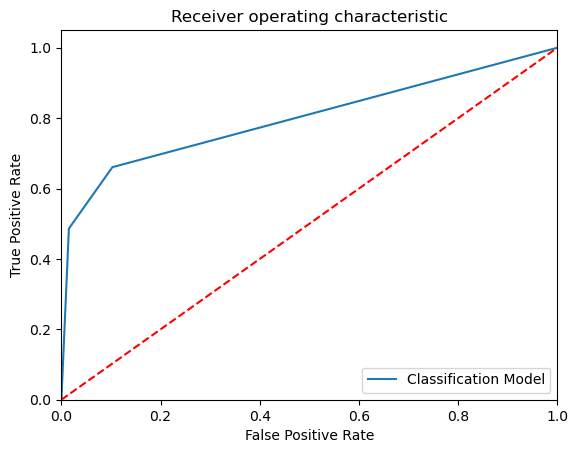

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 5940  4882]
 [ 1244 32535]]
Outcome values : 
 5940 4882 1244 32535
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.55      0.66     10822
           0       0.87      0.96      0.91     33779

    accuracy                           0.86     44601
   macro avg       0.85      0.76      0.79     44601
weighted avg       0.86      0.86      0.85     44601

Accuracy : 86.3 %
Precision : 82.7 %
Recall : 54.9 %
F1 Score : 0.66
Specificity or True Negative Rate : 96.3 %
Balanced Accuracy : 75.6 %
MCC : 0.597
roc_auc_score: 0.756


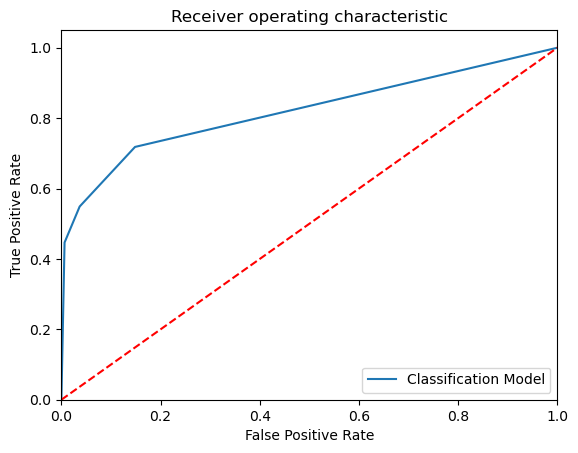

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 5356  5466]
 [  531 33248]]
Outcome values : 
 5356 5466 531 33248
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.49      0.64     10822
           0       0.86      0.98      0.92     33779

    accuracy                           0.87     44601
   macro avg       0.88      0.74      0.78     44601
weighted avg       0.87      0.87      0.85     44601

Accuracy : 86.6 %
Precision : 91.0 %
Recall : 49.5 %
F1 Score : 0.641
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 74.0 %
MCC : 0.607
roc_auc_score: 0.74


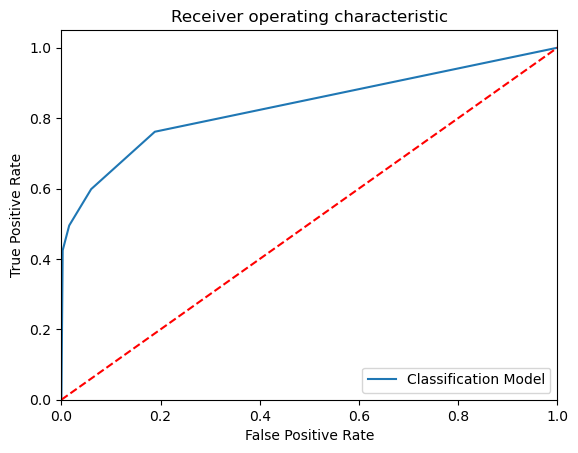

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 5790  5032]
 [  947 32832]]
Outcome values : 
 5790 5032 947 32832
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.54      0.66     10822
           0       0.87      0.97      0.92     33779

    accuracy                           0.87     44601
   macro avg       0.86      0.75      0.79     44601
weighted avg       0.87      0.87      0.85     44601

Accuracy : 86.6 %
Precision : 85.9 %
Recall : 53.5 %
F1 Score : 0.659
Specificity or True Negative Rate : 97.2 %
Balanced Accuracy : 75.4 %
MCC : 0.607
roc_auc_score: 0.753


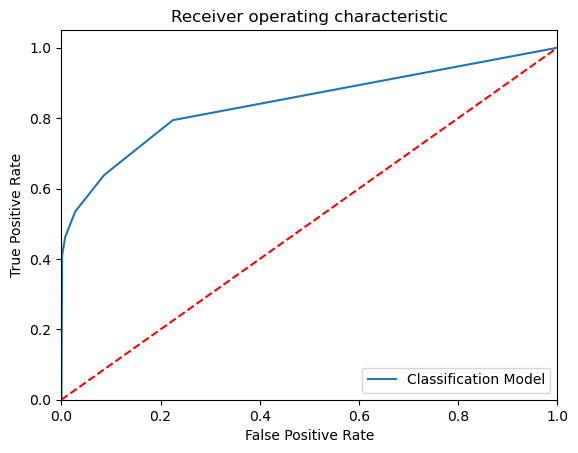

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 5372  5450]
 [  522 33257]]
Outcome values : 
 5372 5450 522 33257
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.50      0.64     10822
           0       0.86      0.98      0.92     33779

    accuracy                           0.87     44601
   macro avg       0.89      0.74      0.78     44601
weighted avg       0.87      0.87      0.85     44601

Accuracy : 86.6 %
Precision : 91.1 %
Recall : 49.6 %
F1 Score : 0.643
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 74.0 %
MCC : 0.609
roc_auc_score: 0.74


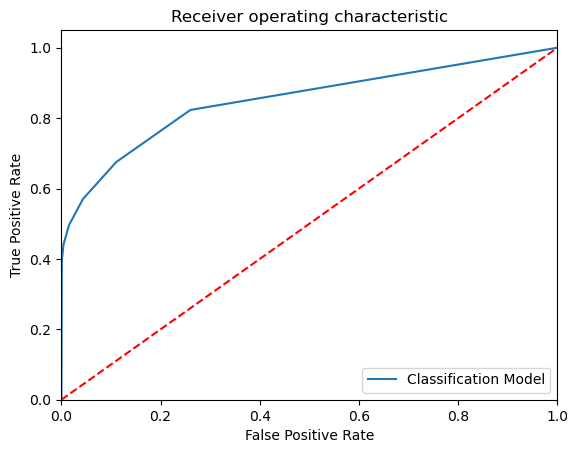

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 5671  5151]
 [  808 32971]]
Outcome values : 
 5671 5151 808 32971
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.52      0.66     10822
           0       0.86      0.98      0.92     33779

    accuracy                           0.87     44601
   macro avg       0.87      0.75      0.79     44601
weighted avg       0.87      0.87      0.85     44601

Accuracy : 86.6 %
Precision : 87.5 %
Recall : 52.4 %
F1 Score : 0.656
Specificity or True Negative Rate : 97.6 %
Balanced Accuracy : 75.0 %
MCC : 0.608
roc_auc_score: 0.75


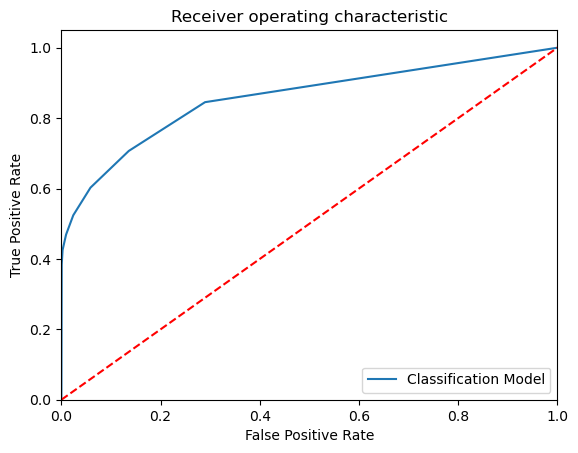

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 5348  5474]
 [  498 33281]]
Outcome values : 
 5348 5474 498 33281
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.49      0.64     10822
           0       0.86      0.99      0.92     33779

    accuracy                           0.87     44601
   macro avg       0.89      0.74      0.78     44601
weighted avg       0.87      0.87      0.85     44601

Accuracy : 86.6 %
Precision : 91.5 %
Recall : 49.4 %
F1 Score : 0.642
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 74.0 %
MCC : 0.609
roc_auc_score: 0.74


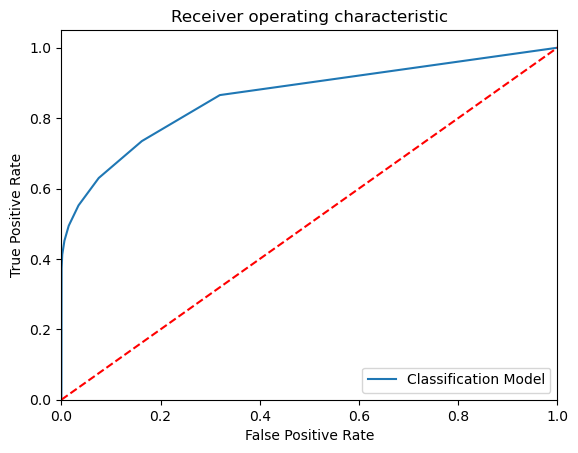

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 5609  5213]
 [  731 33048]]
Outcome values : 
 5609 5213 731 33048
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.52      0.65     10822
           0       0.86      0.98      0.92     33779

    accuracy                           0.87     44601
   macro avg       0.87      0.75      0.79     44601
weighted avg       0.87      0.87      0.85     44601

Accuracy : 86.7 %
Precision : 88.5 %
Recall : 51.8 %
F1 Score : 0.654
Specificity or True Negative Rate : 97.8 %
Balanced Accuracy : 74.8 %
MCC : 0.61
roc_auc_score: 0.748


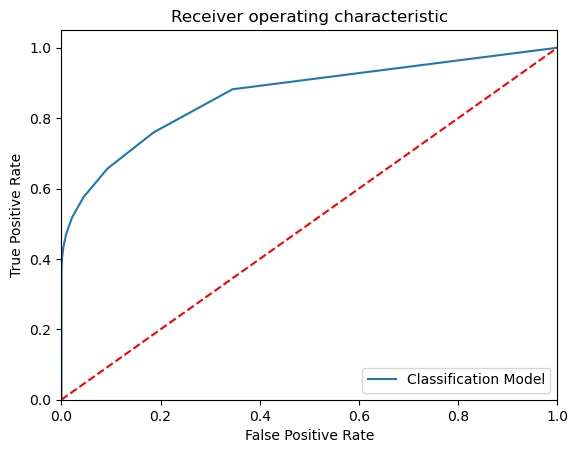

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 5339  5483]
 [  495 33284]]
Outcome values : 
 5339 5483 495 33284
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.49      0.64     10822
           0       0.86      0.99      0.92     33779

    accuracy                           0.87     44601
   macro avg       0.89      0.74      0.78     44601
weighted avg       0.87      0.87      0.85     44601

Accuracy : 86.6 %
Precision : 91.5 %
Recall : 49.3 %
F1 Score : 0.641
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 73.9 %
MCC : 0.609
roc_auc_score: 0.739


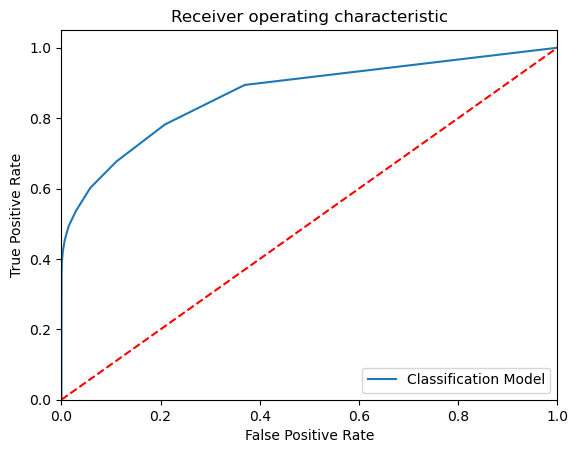

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[ 5543  5279]
 [  678 33101]]
Outcome values : 
 5543 5279 678 33101
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.51      0.65     10822
           0       0.86      0.98      0.92     33779

    accuracy                           0.87     44601
   macro avg       0.88      0.75      0.78     44601
weighted avg       0.87      0.87      0.85     44601

Accuracy : 86.6 %
Precision : 89.1 %
Recall : 51.2 %
F1 Score : 0.65
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 74.6 %
MCC : 0.609
roc_auc_score: 0.746


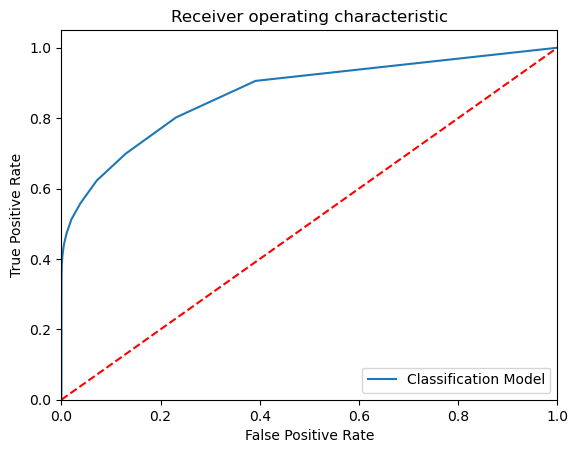

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[ 5305  5517]
 [  493 33286]]
Outcome values : 
 5305 5517 493 33286
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.49      0.64     10822
           0       0.86      0.99      0.92     33779

    accuracy                           0.87     44601
   macro avg       0.89      0.74      0.78     44601
weighted avg       0.87      0.87      0.85     44601

Accuracy : 86.5 %
Precision : 91.5 %
Recall : 49.0 %
F1 Score : 0.638
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 73.8 %
MCC : 0.606
roc_auc_score: 0.738


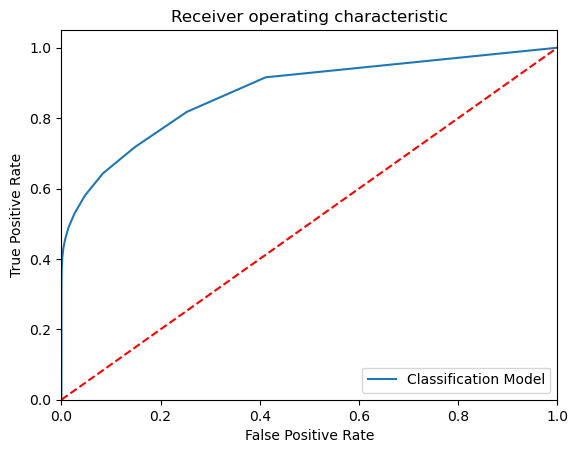

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[ 5477  5345]
 [  637 33142]]
Outcome values : 
 5477 5345 637 33142
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.51      0.65     10822
           0       0.86      0.98      0.92     33779

    accuracy                           0.87     44601
   macro avg       0.88      0.74      0.78     44601
weighted avg       0.87      0.87      0.85     44601

Accuracy : 86.6 %
Precision : 89.6 %
Recall : 50.6 %
F1 Score : 0.647
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 74.4 %
MCC : 0.607
roc_auc_score: 0.744


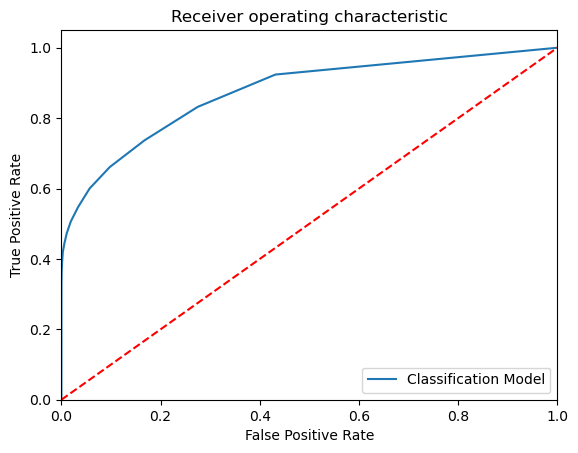

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 5266  5556]
 [  479 33300]]
Outcome values : 
 5266 5556 479 33300
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.49      0.64     10822
           0       0.86      0.99      0.92     33779

    accuracy                           0.86     44601
   macro avg       0.89      0.74      0.78     44601
weighted avg       0.87      0.86      0.85     44601

Accuracy : 86.5 %
Precision : 91.7 %
Recall : 48.7 %
F1 Score : 0.636
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 73.6 %
MCC : 0.605
roc_auc_score: 0.736


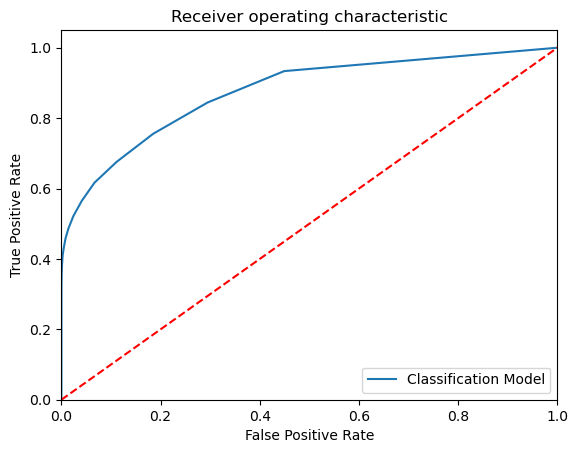

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[ 5427  5395]
 [  618 33161]]
Outcome values : 
 5427 5395 618 33161
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.50      0.64     10822
           0       0.86      0.98      0.92     33779

    accuracy                           0.87     44601
   macro avg       0.88      0.74      0.78     44601
weighted avg       0.87      0.87      0.85     44601

Accuracy : 86.5 %
Precision : 89.8 %
Recall : 50.1 %
F1 Score : 0.644
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 74.2 %
MCC : 0.605
roc_auc_score: 0.742


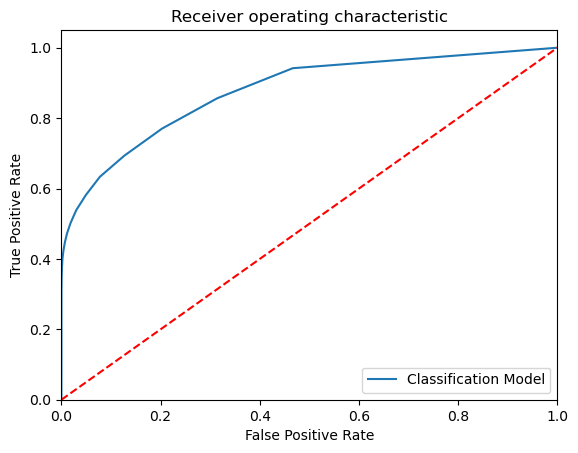

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[ 5249  5573]
 [  484 33295]]
Outcome values : 
 5249 5573 484 33295
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.49      0.63     10822
           0       0.86      0.99      0.92     33779

    accuracy                           0.86     44601
   macro avg       0.89      0.74      0.78     44601
weighted avg       0.87      0.86      0.85     44601

Accuracy : 86.4 %
Precision : 91.6 %
Recall : 48.5 %
F1 Score : 0.634
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 73.6 %
MCC : 0.603
roc_auc_score: 0.735


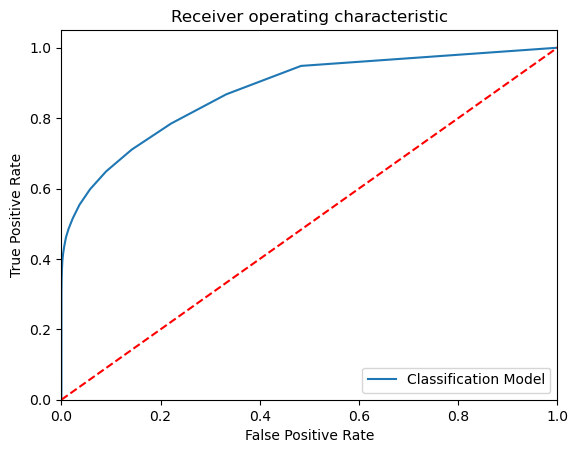

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[ 5386  5436]
 [  594 33185]]
Outcome values : 
 5386 5436 594 33185
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.50      0.64     10822
           0       0.86      0.98      0.92     33779

    accuracy                           0.86     44601
   macro avg       0.88      0.74      0.78     44601
weighted avg       0.87      0.86      0.85     44601

Accuracy : 86.5 %
Precision : 90.1 %
Recall : 49.8 %
F1 Score : 0.641
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 74.0 %
MCC : 0.604
roc_auc_score: 0.74


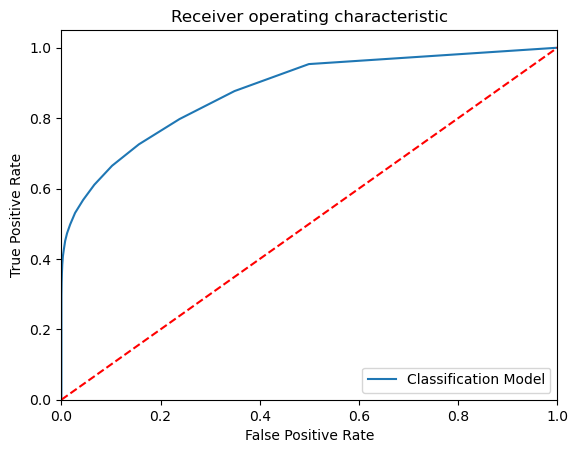

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 5237  5585]
 [  460 33319]]
Outcome values : 
 5237 5585 460 33319
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.48      0.63     10822
           0       0.86      0.99      0.92     33779

    accuracy                           0.86     44601
   macro avg       0.89      0.74      0.78     44601
weighted avg       0.87      0.86      0.85     44601

Accuracy : 86.4 %
Precision : 91.9 %
Recall : 48.4 %
F1 Score : 0.634
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 73.5 %
MCC : 0.604
roc_auc_score: 0.735


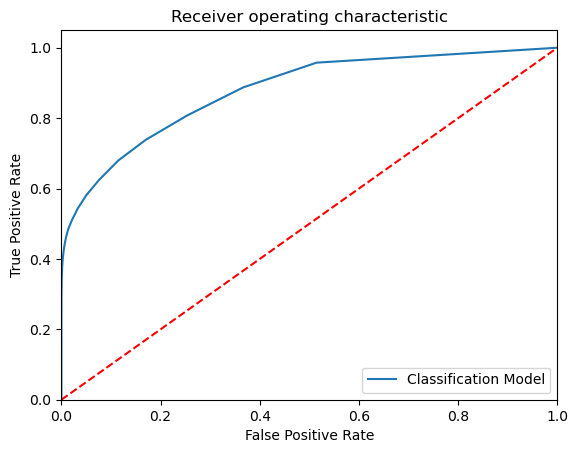

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[ 5349  5473]
 [  566 33213]]
Outcome values : 
 5349 5473 566 33213
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.49      0.64     10822
           0       0.86      0.98      0.92     33779

    accuracy                           0.86     44601
   macro avg       0.88      0.74      0.78     44601
weighted avg       0.87      0.86      0.85     44601

Accuracy : 86.5 %
Precision : 90.4 %
Recall : 49.4 %
F1 Score : 0.639
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 73.8 %
MCC : 0.604
roc_auc_score: 0.739


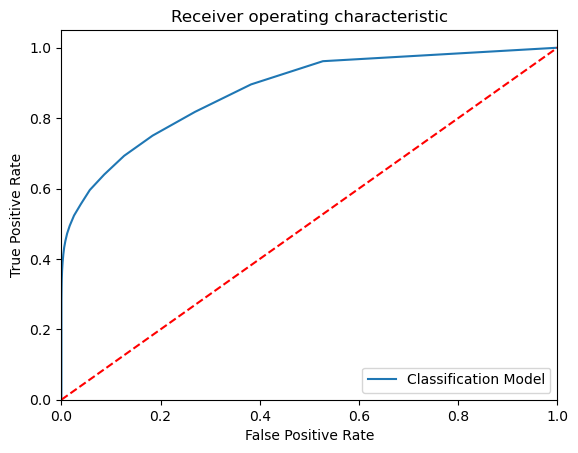

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[ 5213  5609]
 [  465 33314]]
Outcome values : 
 5213 5609 465 33314
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.48      0.63     10822
           0       0.86      0.99      0.92     33779

    accuracy                           0.86     44601
   macro avg       0.89      0.73      0.77     44601
weighted avg       0.87      0.86      0.85     44601

Accuracy : 86.4 %
Precision : 91.8 %
Recall : 48.2 %
F1 Score : 0.632
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 73.4 %
MCC : 0.602
roc_auc_score: 0.734


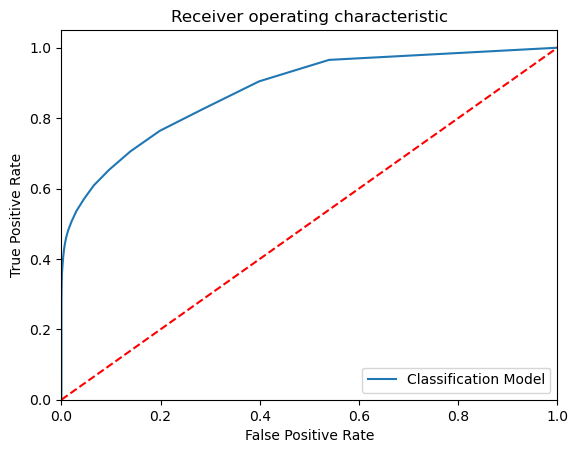

In [28]:
# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [29]:
#loading the result model file
Emresults=pd.read_csv(r"C:\Users\gowth\Downloads\EMResults.csv",header=0)

Emresults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# BUILD THE CLASSIFICATION MODELS AND COMPARE THE RESULTS

Model Name:  LogisticRegression()
Confusion matrix : 
 [[10802    20]
 [10969 22810]]
Outcome values : 
 10802 20 10969 22810
Classification report : 
               precision    recall  f1-score   support

           1       0.50      1.00      0.66     10822
           0       1.00      0.68      0.81     33779

    accuracy                           0.75     44601
   macro avg       0.75      0.84      0.73     44601
weighted avg       0.88      0.75      0.77     44601

Accuracy : 75.4 %
Precision : 49.6 %
Recall : 99.8 %
F1 Score : 0.663
Specificity or True Negative Rate : 67.5 %
Balanced Accuracy : 83.6 %
MCC : 0.578
roc_auc_score: 0.837


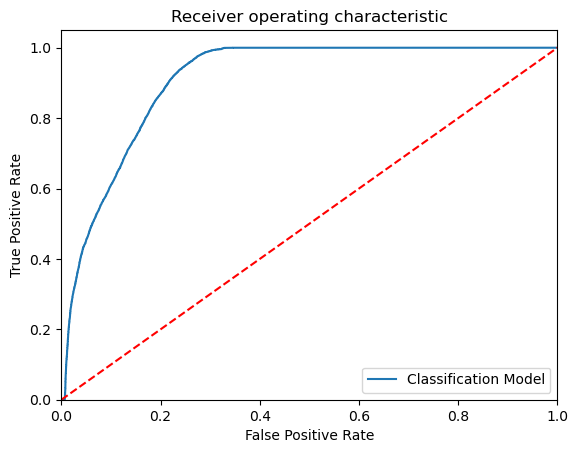

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 2763  8059]
 [    3 33776]]
Outcome values : 
 2763 8059 3 33776
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.26      0.41     10822
           0       0.81      1.00      0.89     33779

    accuracy                           0.82     44601
   macro avg       0.90      0.63      0.65     44601
weighted avg       0.85      0.82      0.78     44601

Accuracy : 81.9 %
Precision : 99.9 %
Recall : 25.5 %
F1 Score : 0.407
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 62.8 %
MCC : 0.454
roc_auc_score: 0.628


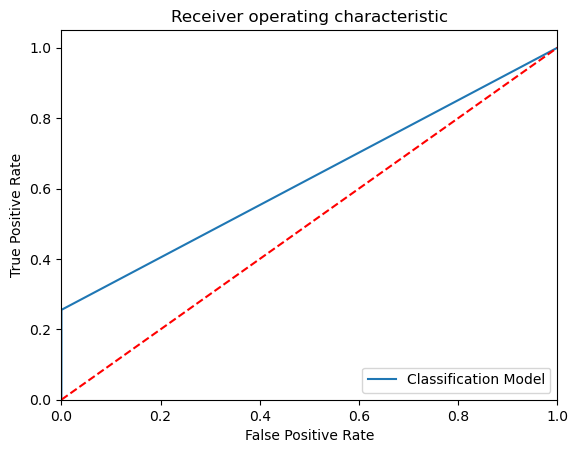

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[   49 10773]
 [    0 33779]]
Outcome values : 
 49 10773 0 33779
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.01     10822
           0       0.76      1.00      0.86     33779

    accuracy                           0.76     44601
   macro avg       0.88      0.50      0.44     44601
weighted avg       0.82      0.76      0.66     44601

Accuracy : 75.8 %
Precision : 100.0 %
Recall : 0.5 %
F1 Score : 0.009
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.2 %
MCC : 0.059
roc_auc_score: 0.502


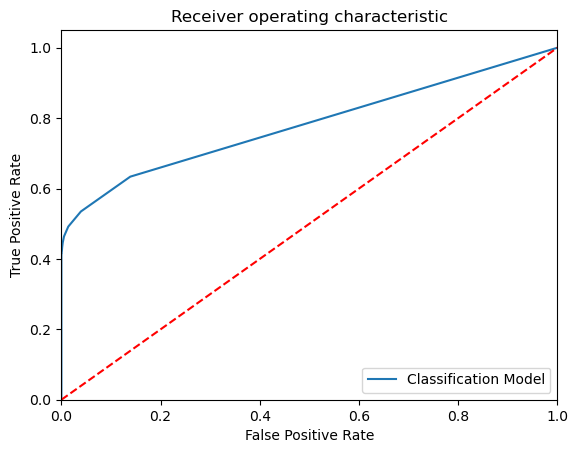

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 1782  9040]
 [    0 33779]]
Outcome values : 
 1782 9040 0 33779
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.16      0.28     10822
           0       0.79      1.00      0.88     33779

    accuracy                           0.80     44601
   macro avg       0.89      0.58      0.58     44601
weighted avg       0.84      0.80      0.74     44601

Accuracy : 79.7 %
Precision : 100.0 %
Recall : 16.5 %
F1 Score : 0.283
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 58.2 %
MCC : 0.36
roc_auc_score: 0.582


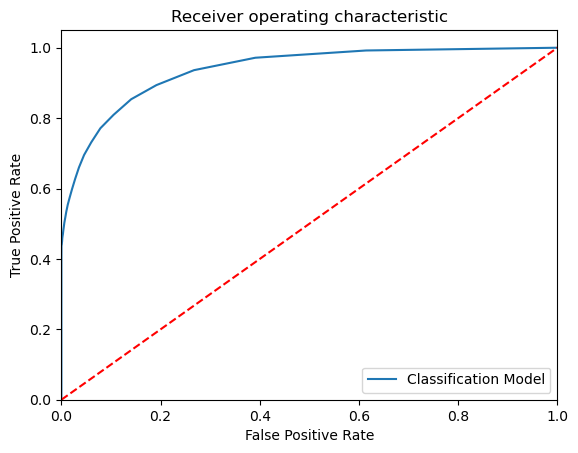

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 5790  5032]
 [  947 32832]]
Outcome values : 
 5790 5032 947 32832
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.54      0.66     10822
           0       0.87      0.97      0.92     33779

    accuracy                           0.87     44601
   macro avg       0.86      0.75      0.79     44601
weighted avg       0.87      0.87      0.85     44601

Accuracy : 86.6 %
Precision : 85.9 %
Recall : 53.5 %
F1 Score : 0.659
Specificity or True Negative Rate : 97.2 %
Balanced Accuracy : 75.4 %
MCC : 0.607
roc_auc_score: 0.753


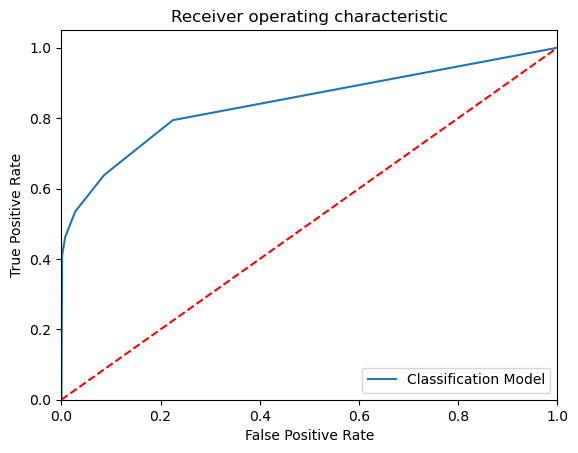

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[    7 10815]
 [    0 33779]]
Outcome values : 
 7 10815 0 33779
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.00     10822
           0       0.76      1.00      0.86     33779

    accuracy                           0.76     44601
   macro avg       0.88      0.50      0.43     44601
weighted avg       0.82      0.76      0.65     44601

Accuracy : 75.8 %
Precision : 100.0 %
Recall : 0.1 %
F1 Score : 0.001
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : 0.022
roc_auc_score: 0.5


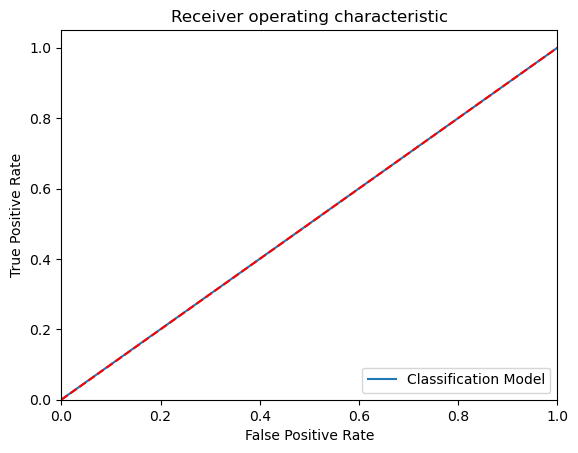

-----------------------------------------------------------------------------------------------------


In [30]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
#ModelSVM = SVC(probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR,ModelDC,ModelRF,ModelET,ModelKNN, ModelGNB]
for models in MM:
   
    # Fit the model
   
    models.fit(x_train, y_train)
   
    # Prediction
   
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
   
    # Print the model name
   
    print('Model Name: ', models)
   
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
   
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
   
    # ROC Curve
   
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    Emresults = Emresults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------



In [31]:
Emresults.head(20)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),10802,20,10969,22810,0.754,0.496,0.998,0.663,0.675,0.578,0.836712,0.836
1,DecisionTreeClassifier(),2763,8059,3,33776,0.819,0.999,0.255,0.407,1.000,0.454,0.627612,0.628
2,"(DecisionTreeClassifier(max_features='sqrt', r...",49,10773,0,33779,0.758,1.000,0.005,0.009,1.000,0.059,0.502264,0.502
3,"(ExtraTreeClassifier(random_state=548149545), ...",1782,9040,0,33779,0.797,1.000,0.165,0.283,1.000,0.360,0.582332,0.582
4,KNeighborsClassifier(),5790,5032,947,32832,0.866,0.859,0.535,0.659,0.972,0.607,0.753493,0.754
5,GaussianNB(),7,10815,0,33779,0.758,1.000,0.001,0.001,1.000,0.022,0.500323,0.500


In [32]:
#predicting the best model result
y_pred1=ModelKNN.predict(x_test)

In [33]:
# Display the Final results

Results = pd.DataFrame({'Status_A':y_test, 'Status_P':y_pred1})

# Merge two Dataframes on index of both the dataframes

ResultsFinal =Loandata_bk.merge(Results, left_index=True, right_index=True)

# Display 10 records randomly

ResultsFinal.sample(10)


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1,Status_A,Status_P
94873,119763,2019,cf,Joint,nopre,type3,p4,l1,nopc,nob/c,256500,2.875,-0.8038,1528.54,360.0,not_neg,not_int,not_lpsm,518000.0,sb,pr,home,1U,NaN,CIB,859,EXP,65-74,to_inst,49.517375,North,direct,0,NaN,0,0
69541,94431,2019,ncf,Male,nopre,type1,p4,l1,nopc,nob/c,926500,NaN,NaN,NaN,360.0,neg_amm,not_int,not_lpsm,1258000.0,sb,pr,home,1U,10860.0,CIB,673,CIB,35-44,not_inst,73.648649,south,direct,1,43.0,1,1
129518,154408,2019,cf,Joint,nopre,type1,p4,l1,nopc,nob/c,326500,3.625,0.1702,1810.20,360.0,not_neg,not_int,not_lpsm,568000.0,sb,pr,home,1U,2940.0,CIB,633,EXP,65-74,not_inst,57.482394,North,direct,0,45.0,0,0
137916,162806,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,406500,NaN,NaN,NaN,240.0,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,7620.0,EQUI,634,EXP,55-64,to_inst,NaN,North,direct,1,NaN,1,1
44635,69525,2019,ncf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,776500,3.125,-0.4836,10642.50,360.0,not_neg,not_int,not_lpsm,1018000.0,sb,pr,home,1U,10800.0,CRIF,628,EXP,45-54,to_inst,76.277014,south,direct,0,33.0,0,0
121252,146142,2019,cf,Female,pre,type1,p1,l1,nopc,nob/c,116500,4.500,0.5910,2440.15,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,3000.0,EXP,774,CIB,35-44,to_inst,98.728814,North,direct,0,47.0,0,0
139788,164678,2019,cf,Joint,nopre,type1,p4,l1,nopc,nob/c,726500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,12120.0,EQUI,608,EXP,35-44,not_inst,NaN,south,direct,1,NaN,1,1
24490,49380,2019,cf,Joint,nopre,type1,p1,l1,nopc,nob/c,576500,4.500,0.3981,0.00,360.0,not_neg,not_int,not_lpsm,818000.0,sb,pr,home,1U,7200.0,EXP,671,EXP,45-54,not_inst,70.476773,North,direct,0,43.0,0,0
131998,156888,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,316500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,12600.0,EQUI,540,EXP,45-54,to_inst,NaN,North,direct,1,NaN,1,1
65037,89927,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,116500,4.990,0.8655,2533.04,360.0,not_neg,not_int,not_lpsm,208000.0,sb,pr,home,1U,1500.0,CIB,652,CIB,65-74,to_inst,56.009615,North,direct,0,42.0,0,0


In [34]:
ResultsFinal['Status_A'].value_counts()

0    33779
1    10822
Name: Status_A, dtype: int64

In [35]:
ResultsFinal['Status_P'].value_counts()

0    37864
1     6737
Name: Status_P, dtype: int64

In [36]:
KNN_Results.head(30)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,6223,4599,1792,31987,0.857,0.776,0.575,0.661,0.947,0.583,0.760991,0.761
1,KNeighborsClassifier(n_neighbors=2),2,5262,5560,509,33270,0.864,0.912,0.486,0.634,0.985,0.602,0.735582,0.736
2,KNeighborsClassifier(n_neighbors=3),3,5940,4882,1244,32535,0.863,0.827,0.549,0.660,0.963,0.597,0.756027,0.756
3,KNeighborsClassifier(n_neighbors=4),4,5356,5466,531,33248,0.866,0.910,0.495,0.641,0.984,0.607,0.739599,0.740
4,KNeighborsClassifier(),5,5790,5032,947,32832,0.866,0.859,0.535,0.659,0.972,0.607,0.753493,0.754
5,KNeighborsClassifier(n_neighbors=6),6,5372,5450,522,33257,0.866,0.911,0.496,0.643,0.985,0.609,0.740471,0.740
6,KNeighborsClassifier(n_neighbors=7),7,5671,5151,808,32971,0.866,0.875,0.524,0.656,0.976,0.608,0.750052,0.750
7,KNeighborsClassifier(n_neighbors=8),8,5348,5474,498,33281,0.866,0.915,0.494,0.642,0.985,0.609,0.739718,0.740
8,KNeighborsClassifier(n_neighbors=9),9,5609,5213,731,33048,0.867,0.885,0.518,0.654,0.978,0.610,0.748328,0.748
9,KNeighborsClassifier(n_neighbors=10),10,5339,5483,495,33284,0.866,0.915,0.493,0.641,0.985,0.609,0.739346,0.739
